Trabajo realizado por:

*   Jairo Silvera
*   Manuel Piñar
*   Lidia Sanz






INDICE

A. ANÁLISIS EXPLORATORIO

B. RED NEURONAL SENCILLA

C. RED NEURONAL PREENTRENADA SENCILLA: VGG16

D. RED NEURONAL PREENTRENADA COMPLEJA: ResNet50

CONCLUSIÓN FINAL


____________________________________________________________________________________________________________________________________________________________

**A. ANÁLISIS EXPLORATORIO**
*   A1. Importar librerías y conjuntos de datos
*   A2. Visualizar una imagen del dataset
*   A3. Edge detector



A1. Importar librerias y conjuntos de datos

In [ ]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random
import os

import skimage
from skimage import data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
XRAY_Directory = "/content/drive/MyDrive/Data/Dataset"

A2. Visualizar una imagen del dataset

In [ ]:
import random, os
path = r"/content/drive/MyDrive/Data/Dataset/2"
random_filename = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
print(random_filename)

person1655_virus_2861.jpeg


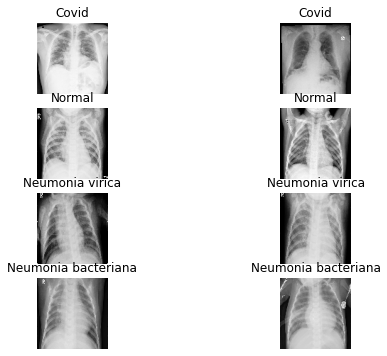

(133, 133, 133, 133)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline

train_dir = '/content/drive/MyDrive/Data/Dataset' # image folder 

# Obtenemos la lista de jpegs
normal_imgs = [fn for fn in os.listdir(f'{train_dir}/1') if fn.endswith('.jpeg')]
pneumo_bact_imgs = [fn for fn in os.listdir(f'{train_dir}/3') if fn.endswith('.jpeg')]
covid_imgs =  [fn for fn in os.listdir(f'{train_dir}/0')]
pnuemo_viral_imgs =  [fn for fn in os.listdir(f'{train_dir}/2') if fn.endswith('.jpeg')]

# Aletaroriamente seleccionamos 
select_norm = np.random.choice(normal_imgs, 2, replace = False)
select_pneu_bact = np.random.choice(pneumo_bact_imgs, 2, replace = False)
select_pneu_viral = np.random.choice(pnuemo_viral_imgs, 2, replace = False)
select_covid = np.random.choice(covid_imgs, 2, replace = False)

# Reprensentamos
fig = plt.figure(figsize = (8,6))
for i in range(8):
    if i < 2:
        fp = f'{train_dir}/0/{select_covid[i]}'
        label = 'Covid'
    elif i < 4:
        fp = f'{train_dir}/1/{select_norm[i-4]}'
        label = 'Normal'
    elif i < 6:
        fp = f'{train_dir}/2/{select_pneu_viral[i-6]}'
        label = 'Neumonia virica'
    else:
        fp = f'{train_dir}/3/{select_pneu_bact[i-8]}'
        label = 'Neumonia bacteriana'
      



    ax = fig.add_subplot(4, 2, i+1)
    

    fn = image.load_img(fp, target_size = (100,100), color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

# Comprobamos el numero de imagenes
len(covid_imgs), len(normal_imgs), len(pnuemo_viral_imgs), len(pneumo_bact_imgs)

A partir de las imágenes extraídas al azar se puede ver que para el ojo humano quizás no sea tan sencillo encontrar una diferencia clara entre cada una de las enfermedades. Si bien, se puede observar que la imágen de un tórax sin enfermedad es mucho más clara que las que tienen patologías. En todas las neumonías y el covid se puede apreciar como aparece una especia de red que envuelve los pulmones.


In [ ]:
def img2np(path, list_of_filename, size = (64, 64)):
    # iteramos a traves de cada fichero
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, color_mode = 'grayscale')
        # Convertimos la imagen a una matrix
        img_ts = image.img_to_array(current_image)
        # Convertimos en un vector 
        img_ts = [img_ts.ravel()]
        try:
            # Concatenamos diferentes imagenes
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # Si no esta asignada, lo asignamos
            full_mat = img_ts
    return full_mat

# Ejecutamos en nuestras carpetas
normal_images = img2np(f'{train_dir}/1/', normal_imgs)
pnemonia_viral_images = img2np(f'{train_dir}/2/', pnuemo_viral_imgs)
covid_images = img2np(f'{train_dir}/0/', covid_imgs)
pneumo_bact_images = img2np(f'{train_dir}/3/', pneumo_bact_imgs)

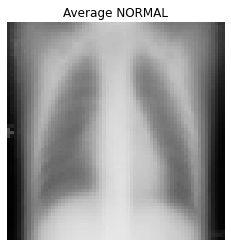

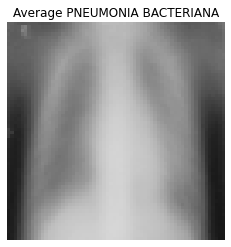

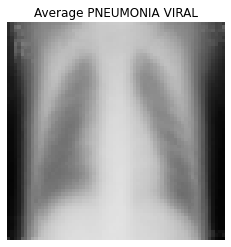

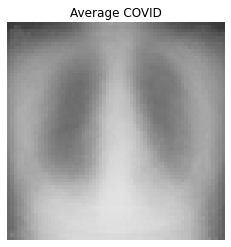

In [ ]:
def find_mean_img(full_mat, title, size = (64, 64)):
    # Calculamos la media
    mean_img = np.mean(full_mat, axis = 0)
    # Creamos la matriz de nuevo
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

norm_mean = find_mean_img(normal_images, 'NORMAL')
pneu_mean_bact = find_mean_img(pneumo_bact_images, 'PNEUMONIA BACTERIANA')
pneu_mean_viral = find_mean_img(pnemonia_viral_images, 'PNEUMONIA VIRAL')
covid_mean = find_mean_img(covid_images, 'COVID')

Con el average de las imágenes se puede apreciar el contorno de los pulmones de alguien sano a cuando padece algunas de las enfermedades respiratorias descritas en este estudio

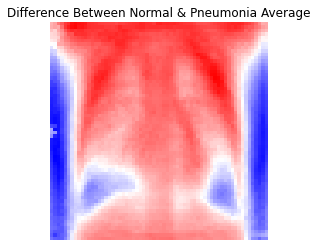

In [ ]:
#Vemos el contraste entre normal y neumonia
contrast_mean = norm_mean - covid_mean
plt.imshow(contrast_mean, cmap='bwr')
plt.title(f'Difference Between Normal & Pneumonia Average')
plt.axis('off')
plt.show()

A3. Edge detector

In [ ]:
#usamos edge detector para ver los bordes de la imagen
from skimage.feature import canny
from scipy import ndimage as ndi
img_edges = canny(covid_mean)
img_edges2 = canny(norm_mean)
img_edges3 = canny(pneu_mean_bact)
img_edges4 = canny(pneu_mean_viral)

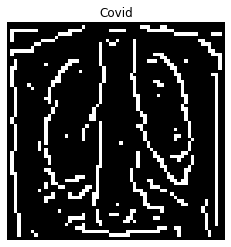

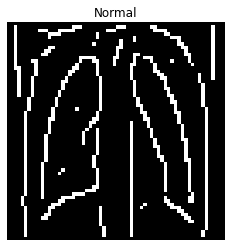

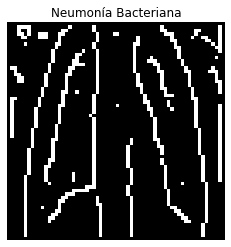

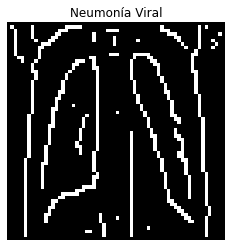

In [ ]:
#Representamos

#figure, axis = plt.subplots(2, 2)

plt.imshow(img_edges, 'gray')
plt.title('Covid')
plt.axis('off')
plt.show()

plt.imshow(img_edges2, 'gray')
plt.title('Normal')
plt.axis('off')
plt.show()

plt.imshow(img_edges3, 'gray')
plt.title('Neumonía Bacteriana')
plt.axis('off')
plt.show()

plt.imshow(img_edges4, 'gray')
plt.title('Neumonía Viral')
plt.axis('off')
plt.show()


Usando canny se aprecian los contornos en los pulmones, la diferencia entre pulmones sanos y enfermos es evidente.

____________________________________________________________________________________________________________________________________________________________

**B. RED NEURONAL SENCILLA:**
*   B1. Importar librerías y conjuntos de datos
*   B2. Construir y entrenar el modelo
*   Conclusión



B1. Importar librerías y conjuntos de datos

In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
tf.compat.v1.set_random_seed(2019)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
XRAY_Directory = "/content/drive/MyDrive/Data/Dataset"

B2. Construir y entrenar el modelo

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(180, 180, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

In [ ]:
#especificamos los optimizadores
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
adam=Adam(lr=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2) # con el ImageDataGenerator hacemos un split para validacion 20%

In [ ]:
train_generator = image_generator.flow_from_directory(batch_size = 40, directory=XRAY_Directory, shuffle=True,
                                                      target_size=(256, 256), class_mode="categorical", subset="training") # subset para training 428 imagenes

Found 428 images belonging to 4 classes.


In [ ]:
train_generator = image_generator.flow_from_directory(batch_size = 40, directory=XRAY_Directory, shuffle=True,
                                                      target_size=(256, 256), class_mode="categorical", subset="validation") # subset para training 104 imagenes

Found 104 images belonging to 4 classes.


In [ ]:
#bs=30         # Ajuste del tamaño del lote
#XRAY_Directory = '/content/drive/MyDrive/Data/Dataset' # 
#validation_dir = "/content/drive/MyDrive/Data/Test"   # Configuración del directorio de pruebas
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
# Todas las imágenes serán reescaladas por 1,/255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
# Imágenes de entrenamiento de flujo en lotes de 30 utilizando el generador train_datagen
# Flow_from_directory permite al clasificador identificar directamente las etiquetas a partir del nombre de los directorios en los que se encuentra la imagen
train_generator=image_generator.flow_from_directory(XRAY_Directory,batch_size=4,class_mode='categorical',target_size=(180,180), subset = "training")
# Imágenes de validación de flujo en lotes de 20 utilizando el generador test_datagen
validation_generator =  image_generator.flow_from_directory(XRAY_Directory,
                                                         batch_size=4,
                                                         class_mode  = 'categorical',
                                                         target_size=(180,180), subset = "validation")


Found 428 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


In [ ]:
#ajustar el modelo
history = model.fit(train_generator,
                    steps_per_epoch=int(428/4),
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=int(104/4)
                  )

Epoch 1/10
107/107 [==============================] - 232s 2s/step - loss: 1.4697 - acc: 0.2383 - val_loss: 1.3539 - val_acc: 0.3173


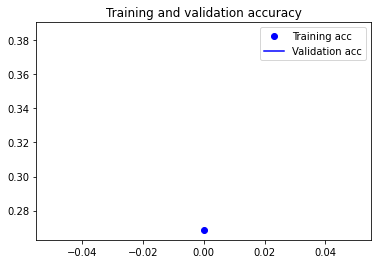

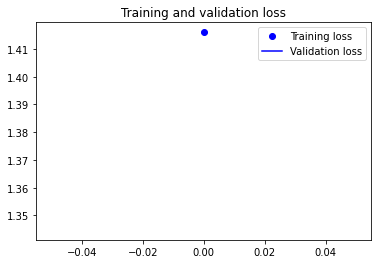

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

A partir de aquí usamos el data augmentation

In [21]:
# a partir de aqui usamos el data augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')


In [22]:
XRAY_Directory = "/content/drive/MyDrive/Data/Dataset" # este es el directorio target

In [23]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2) # con el ImageDataGenerator hacemos un split para validacion 20%

In [24]:
train_generator = image_generator.flow_from_directory(batch_size = 40, directory=XRAY_Directory, shuffle=True,
                                                      target_size=(256, 256), class_mode="categorical", subset="training") # subset para training 428 imagenes

Found 428 images belonging to 4 classes.


In [25]:
train_generator = image_generator.flow_from_directory(batch_size = 40, directory=XRAY_Directory, shuffle=True, 
                                                      target_size=(256, 256), class_mode="categorical", subset="validation") # subset para training 104 imagenes

Found 104 images belonging to 4 classes.


In [26]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


# los datos de validación no deben aumentarse.
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = image_generator.flow_from_directory(
        # target directory
        XRAY_Directory,
        # rescalado a 150x150
        target_size=(150, 150),
        batch_size=4,
        # Dado que utilizamos la pérdida de binary_crossentropy, necesitamos etiquetas binarias
        class_mode='binary', subset="training")

validation_generator = image_generator.flow_from_directory(
        XRAY_Directory,
        target_size=(150, 150),
        batch_size=4,
        class_mode='binary', subset="validation")

history = model.fit_generator(
      train_generator,
      steps_per_epoch=int(428/4), #len(train_dir), #100
      epochs=10, #100
      validation_data=validation_generator, 
      validation_steps=int(104/4)) #len(validation_dir)) #50

Found 428 images belonging to 4 classes.
Found 104 images belonging to 4 classes.
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


107/107 [==============================] - 13s 101ms/step - loss: -915.6970 - acc: 0.2500 - val_loss: -5255.8564 - val_acc: 0.2500
Epoch 2/10
107/107 [==============================] - 11s 101ms/step - loss: -33576.2109 - acc: 0.2500 - val_loss: -89624.5859 - val_acc: 0.2500
Epoch 3/10
107/107 [==============================] - 11s 98ms/step - loss: -245553.0781 - acc: 0.2500 - val_loss: -540565.5000 - val_acc: 0.2500
Epoch 4/10
107/107 [==============================] - 11s 99ms/step - loss: -1137077.8750 - acc: 0.2500 - val_loss: -2102299.0000 - val_acc: 0.2500
Epoch 5/10
107/107 [==============================] - 11s 100ms/step - loss: -3579003.7500 - acc: 0.2500 - val_loss: -5737471.5000 - val_acc: 0.2500
Epoch 6/10
107/107 [==============================] - 11s 100ms/step - loss: -9644604.0000 - acc: 0.2500 - val_loss: -15215685.0000 - val_acc: 0.2500
Epoch 7/10
107/107 [==============================] - 11s 99ms/step - loss: -22020300.0000 - acc: 0.2500 - val_loss: -33244192.0000

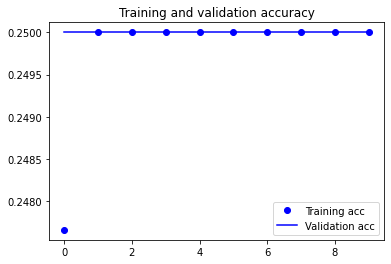

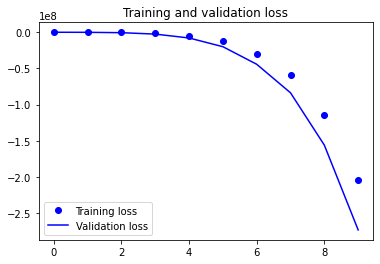

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Mediante el uso de una red sencilla sin preentrenamiento tenemos los siguientes comentarios:


*   Este modelo nos permite observar que existen 532 imagenes de cuatro clases y 40 imagenes que pertenecen a cuatro clases. 
*   Este modelo nos permite entrenar la red neuronal utilizando el conjunto de entrenamiento y evaluar la precisión en el conjunto de test. Obteniendo para cada epoch 'acc' y 'val_acc', que equivalen a la precisión de las predicciones del conjunto de entrenamiento y del conjunto de test.
*   Se obtiene una precisión en torno a 65% en el conjunto de test, lo cual, podemos concluir que no es un modelo con una fiabilidad alta.




____________________________________________________________________________________________________________________________________________________________

**C. RED NEURONAL PREENTRENADA SENCILLA: VGG16**
*   C1. Importar librerías y conjuntos de datos
*   C2. Importar el modelo
*   C3. Construir y entrenar el modelo de deep learning
*   C4. Evaluar el modelo de deep learning entrenado
*   Conclusión

C1. Importar librerías y conjuntos de datos


In [ ]:
import os
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
XRAY_Directory = "/content/drive/MyDrive/Data/Dataset"

C2. Importar el modelo


In [ ]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
from keras.applications.vgg16 import VGG16

basemodel2 = VGG16(weights = "imagenet", include_top = False, input_tensor = Input(shape = (256,256,3)))

In [ ]:
basemodel2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

C3. Construir y entrenar el modelo de deep learning

In [ ]:
# Congelamos el modelo hasta las últimas etapas - 4 y llevar a cabo un re entrenamiento -5 
for layer in basemodel2.layers[:-10]:
  layer.trainable = False

In [ ]:
headmodel = basemodel2.output
headmodel = AveragePooling2D(pool_size=(4,4))(headmodel)
# aplanamos el modelo
# Ahora tenemos un vector muy grande y podemos conectar varias capas densas de una red neuronal con funciones de activación diversas
# Empezamos con una primera capa densa Modell 
headmodel = Flatten(name = 'flatten')(headmodel)
# Usamos la funcion relu para rectificar unitariamente, quita valores negativos y deja los significativos
headmodel = Dense(256, activation = 'relu')(headmodel)

headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(128, activation = 'relu')(headmodel)
headmodel = Dropout(0.2)(headmodel)
# La capa de salida softmax, son 4 neuronas una para cada categoria de enfermedad
# De salida es la funcion de activacion, o sea una variable continua valores entre 0 y 1 porque el resultado es una probabilidad
headmodel = Dense(4, activation = 'softmax')(headmodel)
# Combinamos el modelo con lo que esta congelado y las nuevas capas
model = Model(inputs = basemodel2.input, outputs= headmodel)

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4, decay = 1e-6), metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
earlystopping = EarlyStopping(monitor= 'val_loss', mode = 'min', verbose= 1, patience = 20) # patience es 20 iteraciones si el valor no cambia se queda con el mejor modelo a la fecha y deja de entrenar
# Almacenamos el mejor modelo con la menor pérdida en la validación
checkpointer = ModelCheckpoint(filepath = 'weights.hdf5', verbose=1, save_best_only= True)

In [ ]:
train_generator = image_generator.flow_from_directory(batch_size=4, directory = XRAY_Directory, shuffle = True, target_size=(256, 256), class_mode = "categorical", subset = "training")
val_generator = image_generator.flow_from_directory(batch_size=4, directory = XRAY_Directory, shuffle = True, target_size=(256, 256), class_mode = "categorical", subset = "validation")

Found 428 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


In [ ]:
train_generator

In [ ]:
history= model.fit_generator(train_generator, steps_per_epoch=train_generator.n//4, epochs=10,
                             validation_data = val_generator, validation_steps = val_generator.n//4,
                             callbacks= [checkpointer, earlystopping])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
107/107 [==============================] - ETA: 0s - loss: 1.3594 - accuracy: 0.3879
Epoch 1: val_loss improved from inf to 0.83049, saving model to weights.hdf5
107/107 [==============================] - 219s 2s/step - loss: 1.3594 - accuracy: 0.3879 - val_loss: 0.8305 - val_accuracy: 0.6731
Epoch 2/10
107/107 [==============================] - ETA: 0s - loss: 0.9675 - accuracy: 0.6636
Epoch 2: val_loss improved from 0.83049 to 0.82561, saving model to weights.hdf5
107/107 [==============================] - 25s 229ms/step - loss: 0.9675 - accuracy: 0.6636 - val_loss: 0.8256 - val_accuracy: 0.6923
Epoch 3/10
107/107 [==============================] - ETA: 0s - loss: 0.6313 - accuracy: 0.7850
Epoch 3: val_loss did not improve from 0.82561
107/107 [==============================] - 24s 225ms/step - loss: 0.6313 - accuracy: 0.7850 - val_loss: 0.9117 - val_accuracy: 0.7788
Epoch 4/10
107/107 [==============================] - ETA: 0s - loss: 0.6047 - accuracy: 0.8131
Epoch 4: va

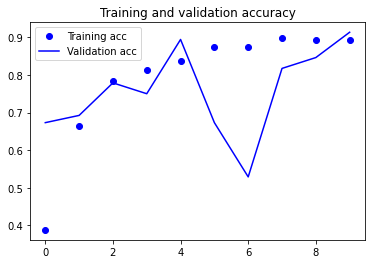

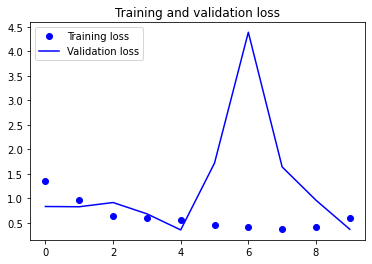

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
#Representamos la precisión entre el conjunto de entramiento y la validacion
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
#Representamos la perdida entre el conjunto de entramiento y la validacion
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Utilizamos el otro conjunto de radiografias para test, escalar, test generator, flowfromdirectory, pasar por la red neuronal
test_directory = '/content/drive/MyDrive/Data/Test'
os.listdir(XRAY_Directory)

['2', '0', '1', '3']

In [ ]:
test_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
testing_generator = test_generator.flow_from_directory(batch_size=40, directory=test_directory, shuffle=True,
                                                       target_size=(256,256), class_mode= "categorical")

Found 40 images belonging to 4 classes.


C4. Evaluar el modelo de deep learning entrenado

In [ ]:
# evaluamos el modelo
evaluate = model.evaluate_generator(testing_generator, steps = testing_generator.n // 4, verbose =1)
print("Precision en la fase test: {}".format(evaluate[1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


10/10 [==============================] - 7s 5ms/step - loss: 0.9117 - accuracy: 0.7750
Precision en la fase test: 0.7749999761581421


In [ ]:
# Matriz de confusion
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Creamos una lista vacia para saber la etiqueta que devuelve la red neuronal 
prediction = []
original = [] # 
image = [] # para mostrar las imagenes en el grafico

# Listamos cada uno de los directorios os.listdir(test_directory)
# join() para leer carpeta y subcarpeta se pasa la variable i con str() y con el path os.path()

for i in range(len(os.listdir(test_directory))):
  for item in os.listdir(os.path.join(test_directory, str(i))):
    img = cv2.imread(os.path.join(test_directory, str(i), item)) # creamos la imagen con la libreria cv2 imread(), pasamos la carpeta madre la version string i esima e item lo q se lee en el bucle actual
    img = cv2.resize(img, (256, 256)) # redimensionamos a 256*256 es lo que  espera la red neuronal
    image.append(img) # unimos con la lista image[]
    img = img / 255 # escalamos manualmente, pixeles en valores 0,1
    img = img.reshape(-1, 256, 256, 3) # con -1 se incrustamos una dimension adicional, es decir un lote con una imagen por que la red se entrena por lotes, lo otro es tamaño y 3 canales de color
    predict = model.predict(img) # modelo para predecir 
    predict = np.argmax(predict) # lo anterior devuelve 4 neuronas, 0,1,2,3, nos quedamos con la que predice el argumento maximo
    prediction.append(predict)# unimos a la lista prediction[]
    original.append(i) # unimos a la lista original[] de la categoria i 

In [ ]:
len(original)

40

In [ ]:
score = accuracy_score(original, prediction) # funcion que recibe dos parametros el real y el prediccion
print("Eficacia de la prediccion {}".format(score))

Eficacia de la prediccion 0.775


In [ ]:
label_names = {0: 'COVID-19', 1: 'Normal', 2:'Pneumonia Virica', 3:'Pneumonia Bacteriana'}

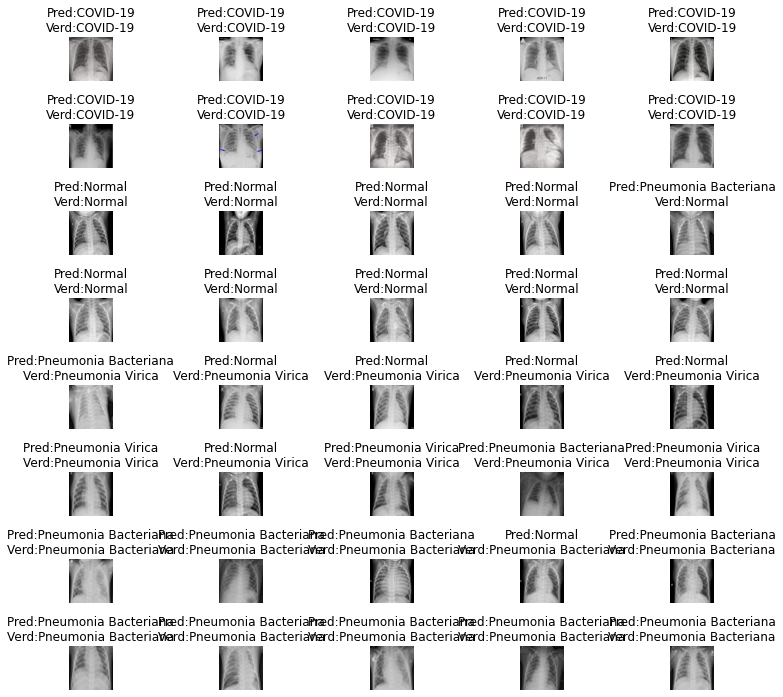

In [ ]:
# Mostramos las imagenes del conjunto test
# 
L = 8
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12)) # figsize es el tamaño
axes = axes.ravel() # aplanamos y rellenamos imagenes una tras otra

for i in np.arange(0, L*W): # se van rellenando los ejes uno por uno
  axes[i].imshow(image[i]) # pintamos la imagen
  axes[i].set_title("Pred:{}\nVerd:{}".format(str(label_names[prediction[i]]), str(label_names[original[i]]))) # label_names se hizo antes es para colocar los titulos del real y el de prediccion
  axes[i].axis('off') # desactivamos los ejes de dibujo
plt.subplots_adjust(wspace=1.2, hspace=1)

In [ ]:
# mostramos el array del original y de prediccion
print(classification_report(np.asarray(original), np.asarray(prediction)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.60      0.90      0.72        10
           2       1.00      0.30      0.46        10
           3       0.75      0.90      0.82        10

    accuracy                           0.78        40
   macro avg       0.84      0.77      0.75        40
weighted avg       0.84      0.78      0.75        40



Text(0.5, 1.0, 'Matriz de Confusion')

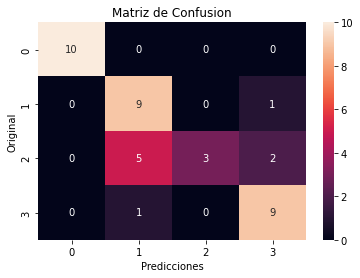

In [ ]:
# matriz de confusion pasamos a objeto numpy el original y el de prediccion
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax) # mapa de calor con anotaciones
ax.set_xlabel("Predicciones")
ax.set_ylabel("Original")
ax.set_title("Matriz de Confusion")

Mediante el uso de la red preentrenada VGG16 tenemos los siguientes comentarios:


*   Logra un excelente resultado en la competencia ImageNet
*   Contienen relativamente pocas capas convolucionales: 13 capas convolucionales y 3 densas, de ahí que en sus nombre incluya el 16.
*   En ejercicios con imagenNEt logra un 97% de accuracy por lo cual es bunea red para problema de clasificación de imagenes 
Con esta red obtuvimos buenos resultados de 91% con la tipologia tipo 0 que es COVID, por las caracteristicas de la enfermedad se distingue los contornos muy distintos a las pneumonias.





____________________________________________________________________________________________________________________________________________________________

**D. RED NEURONAL PREENTRENADA COMPLEJA: ResNet50**


*   D1. Importar librerías y conjuntos de datos
*   D2. Visulizar el dataset
*   D3. Importar el modelo con pesos pre entrenados
*   D4. Construir y entrenar el modelo de deep learning
*   D5. Evaluar el modelo de deep learning entrenado
*   Conclusión

D1. IMPORTAR LIBRERÍAS Y CONJUNTO DE DATOS

In [ ]:
import os
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
XRAY_Directory = "/content/drive/MyDrive/Data/Dataset"

In [ ]:
# Listamos las carpetas de dicho directorio
# 0: covid, 1: normal, 2: neumonia viral, 3: neumonia bacterial
os.listdir(XRAY_Directory)

['2', '0', '1', '3']

In [ ]:
# Generador de imágenes (ImageDataGenerator) para generar datos de imágenes de tensores y normalizarlos
# Utilizamos el 20% de los datos para la validación cruzada posterior
# Reescalamos 1 y 0 porque son entradas de red neuronal para convergencia
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Generamos lotes de 40 imágenes
# El número total de imágenes es 133 * 4 = 532 imágenes
# En entrenamiento (80%)-> 428 imagenes y validación (20%)-> 104 imagenes
# Utilizamos shuffle para que tome muestras aleatorias y usamos directory para que tome los datos del directorio no en memoria
# Utilizamos target_size con el tamaño final de la imagen
# Generamos imagenes de 40 en 40 -> batch_size = 40
train_generator = image_generator.flow_from_directory(batch_size = 40, directory=XRAY_Directory, shuffle=True,
                                                      target_size=(256, 256), class_mode="categorical", subset="training")

Found 428 images belonging to 4 classes.


In [ ]:
train_generator = image_generator.flow_from_directory(batch_size = 40, directory=XRAY_Directory, shuffle=True,
                                                      target_size=(256, 256), class_mode="categorical", subset="validation")

Found 104 images belonging to 4 classes.


In [ ]:
# Generamos un lote de 40 imágenes y etiquetas
train_images, train_labels = next(train_generator)

In [ ]:
train_images.shape

(40, 256, 256, 3)

In [ ]:
train_labels.shape

(40, 4)

In [ ]:
# 0: covid, 1: normal, 2: neumonia viral, 3: neumonia bacterial
train_labels

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]],

In [ ]:
# Traducimos cada etiqueta
label_names = {0: 'COVID-19', 1: 'Normal', 2:'Pneumonia Virica', 3:'Pneumonia Bacteriana'}

D2. VISUALIZAR DEL DATASET

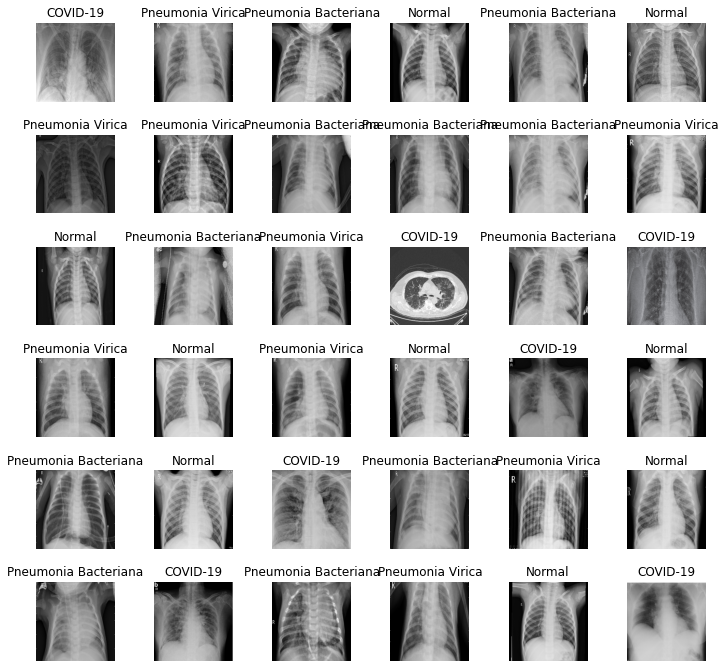

In [ ]:
# Creamos una matriz de 36 imágenes junto con sus etiquetas correspondientes
L = 6
W = 6

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # ravel.() aplana la matriz de 6 + 6 en un vector de  36 posiciones se puede usar un for para iterarlo mas facil
# Esta funcion lo que hace es buscar la posicion donde la etiqueta sea 1 por eso se pasa el diccionarion y argmax() la posicion donde tiene el valor mas elevado
for i in np.arange(0, L*W): # lista desde 0 a L*W
  axes[i].imshow(train_images[i])
  axes[i].set_title(label_names[np.argmax(train_labels[i])])
  axes[i].axis('off') # para que no imprima los titulos porque son imagenes
plt.subplots_adjust(wspace=0.5)

D3. IMPORTAR EL MODELO CON PESOS PRE ENTRENADOS

In [ ]:
# Utilizamos la red neuronal ResNet50
# el input_tensor es la entrada tridimensional o sea las imagenes de las tomografias
basemodel = ResNet50(weights = "imagenet", include_top = False, input_tensor = Input(shape = (256,256,3)))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
#Visualizamos el contenido del modelo
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
# Congelamos el modelo hasta las últimas etapas - 4 y llevamos a cabo un re-entrenamiento -5 
for layer in basemodel.layers[:-10]:
  layer.trainable = False

D4. CONSTRUIR Y ENTRENAR UN MODELO DE DEEP LEARNING

In [ ]:
# ajustamos la salida para el proceso de clasificacion, por tanto las capas finales se consideran sobre este modelo
# ventana del pooling 4*4 al resultao de headmodel
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size=(4,4))(headmodel)
# aplanamos el modelo porque tenemos un vector muy grande, queremos conectar varias capas densas de la red neuronal con varias funciones de activacion
# empezamos con una primera capa densa
headmodel = Flatten(name = 'flatten')(headmodel)
# usamos la funcion relu para quitar valores negativos y dejar los significativos
headmodel = Dense(256, activation = 'relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(128, activation = 'relu')(headmodel)
headmodel = Dropout(0.2)(headmodel)
# para la capa de salida softmax usamos 4 neuronas, una para cada categoria de enfermedad
# el resultado de la capa de salida es una probabilidad entre 0 y 1
headmodel = Dense(4, activation = 'softmax')(headmodel)
# combinanamos el modelo con lo que esta congelado y las nuevas capas
model = Model(inputs = basemodel.input, outputs= headmodel)

In [ ]:
# usamos crossentropy para el proceso de clasificacion de 4 categorias 
# usamos el algoritmo optimizer.RMSprop porque lo que queremos es maximizar el ratio de aciertos y no acercarse a la categoria
# lr lo ponemos bajo para evitar el overfitting
model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4, decay = 1e-6), metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# usamos EarlyStopping para salir del entrenamiento si la pérdida en la validación no disminuye incluso después de ciertas epochs
earlystopping = EarlyStopping(monitor= 'val_loss', mode = 'min', verbose= 1, patience = 20) # patience=20 iteraciones se queda con el mejor modelo a la fecha y para de entrenar
# almacenamos el mejor modelo con la menor pérdida en la validación
checkpointer = ModelCheckpoint(filepath = 'weights.hdf5', verbose=1, save_best_only= True)

In [ ]:
# creamos un conjunto de entrenamiento y validacion con imagegenerator
train_generator = image_generator.flow_from_directory(batch_size=4, directory = XRAY_Directory, shuffle = True, target_size=(256, 256), class_mode = "categorical", subset = "training")
val_generator = image_generator.flow_from_directory(batch_size=4, directory = XRAY_Directory, shuffle = True, target_size=(256, 256), class_mode = "categorical", subset = "validation")

Found 428 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


In [ ]:
# ajuste de entrenamiento,
# la estructura creada anterior va hacer un fit a partir de un generator o sea generar lotes aleatorios de 4 en 4
# steps per epoch sale de dividir 428 entre 4, n es el valor total del lote // es division entera
# son 10 epochs 
# checkpointer guarda el mejor modelo hasta la fecha
# earlystopping detecta si no hay alguna mejora apaga y ya
# los callbacks son dobles, se hicieron previamente

history= model.fit_generator(train_generator, steps_per_epoch=train_generator.n//4, epochs=10,
                             validation_data = val_generator, validation_steps = val_generator.n//4,
                             callbacks= [checkpointer, earlystopping])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/10
107/107 [==============================] - ETA: 0s - loss: 1.4119 - accuracy: 0.3411
Epoch 1: val_loss improved from inf to 1.34135, saving model to weights.hdf5
107/107 [==============================] - 21s 147ms/step - loss: 1.4119 - accuracy: 0.3411 - val_loss: 1.3414 - val_accuracy: 0.3077
Epoch 2/10
107/107 [==============================] - ETA: 0s - loss: 1.1576 - accuracy: 0.5047
Epoch 2: val_loss improved from 1.34135 to 1.29364, saving model to weights.hdf5
107/107 [==============================] - 14s 135ms/step - loss: 1.1576 - accuracy: 0.5047 - val_loss: 1.2936 - val_accuracy: 0.4615
Epoch 3/10
107/107 [==============================] - ETA: 0s - loss: 0.9451 - accuracy: 0.5981
Epoch 3: val_loss improved from 1.29364 to 1.25596, saving model to weights.hdf5
107/107 [==============================] - 16s 146ms/step - loss: 0.9451 - accuracy: 0.5981 - val_loss: 1.2560 - val_accuracy: 0.4231
Epoch 4/10
107/107 [==============================] - ETA: 0s - loss: 0

D5. EVALUAR EL MODELO DE DEEP LEARNING ENTRENADO

In [ ]:
# guardamos en history el performance a tarves de las diferentes epochs, con keys() podemos ver las metricas
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

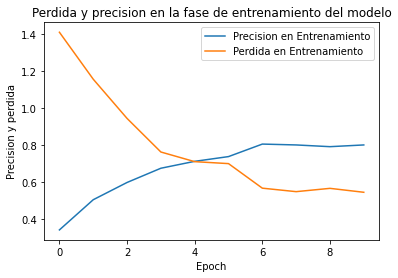

In [ ]:
#Vemos la precisión en el entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title("Perdida y precision en la fase de entrenamiento del modelo")
plt.xlabel("Epoch")
plt.ylabel("Precision y perdida")
plt.legend(["Precision en Entrenamiento", "Perdida en Entrenamiento"])

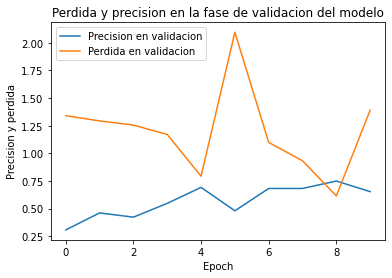

In [ ]:
#Vemos la precisión en la validacion
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title("Perdida y precision en la fase de validacion del modelo")
plt.xlabel("Epoch")
plt.ylabel("Precision y perdida")
plt.legend(["Precision en validacion", "Perdida en validacion"])

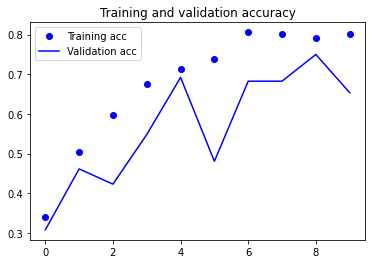

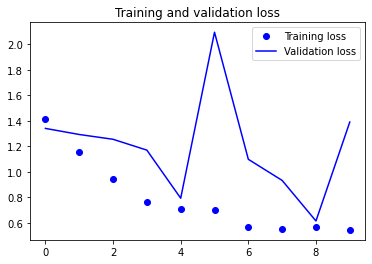

In [ ]:
#Vemos la precisión en entrenamiento y validacion
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# utilizamos el otro conjunto de radiografias para test, escalar, test generator, flowfromdirectory, pasar por la red neuronal
test_directory = '/content/drive/MyDrive/Data/Test'
os.listdir(XRAY_Directory)

['2', '0', '1', '3']

In [ ]:
test_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
testing_generator = test_generator.flow_from_directory(batch_size=40, directory=test_directory, shuffle=True,
                                                       target_size=(256,256), class_mode= "categorical")

Found 40 images belonging to 4 classes.


In [ ]:
# evaluamos el modelo
evaluate = model.evaluate_generator(testing_generator, steps = testing_generator.n // 4, verbose =1)
print("Precision en la fase test: {}".format(evaluate[1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


10/10 [==============================] - 3s 7ms/step - loss: 2.0263 - accuracy: 0.6000
Precision en la fase test: 0.6000000238418579


In [ ]:
# matriz de confusion
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# creamos una lista vacia para saber la etiqueta que devuelve la red neuronal 
prediction = []
original = [] # 
image = [] # para mostrar las imagenes en el grafico

# listamos cada uno de los directorios os.listdir(test_directory)
# usamos join() para leer carpeta y subcarpeta; pasamos la variable i con str() y con el path os.path()

for i in range(len(os.listdir(test_directory))):
  for item in os.listdir(os.path.join(test_directory, str(i))):
    img = cv2.imread(os.path.join(test_directory, str(i), item)) # creamos la imagen con la libreria cv2 imread(), pasamos la carpeta madre, la version string i esima e item lo que se lee en el bucle actual
    img = cv2.resize(img, (256, 256)) # redimensionamos a 256*256 que es lo que espera la red neuronal
    image.append(img) # unimos con la lista image[]
    img = img / 255 # escalamos manualmente, pixeles en valores 0,1
    img = img.reshape(-1, 256, 256, 3) # con -1 incrustamos una dimension adicional, es decir, un lote con una imagen por que la red se entrena por lotes, 256x256 el tamaño y 3 canales de color
    predict = model.predict(img) # usamos el modelo para predecir, devuelve 4 neuronas, 0,1,2,3,
    predict = np.argmax(predict) # nos quedamos con lo que predice el argumento maximo
    prediction.append(predict)# lo unimos a la lista prediction[]
    original.append(i) # lo unimos a la lista original[] de la categoria i que estima actual que es la de verdad

In [ ]:
len(original)

40

In [ ]:
score = accuracy_score(original, prediction) # esta funcion recibe dos parametros el de verdad y el prediction
print("Eficacia de la prediccion {}".format(score))

Eficacia de la prediccion 0.575


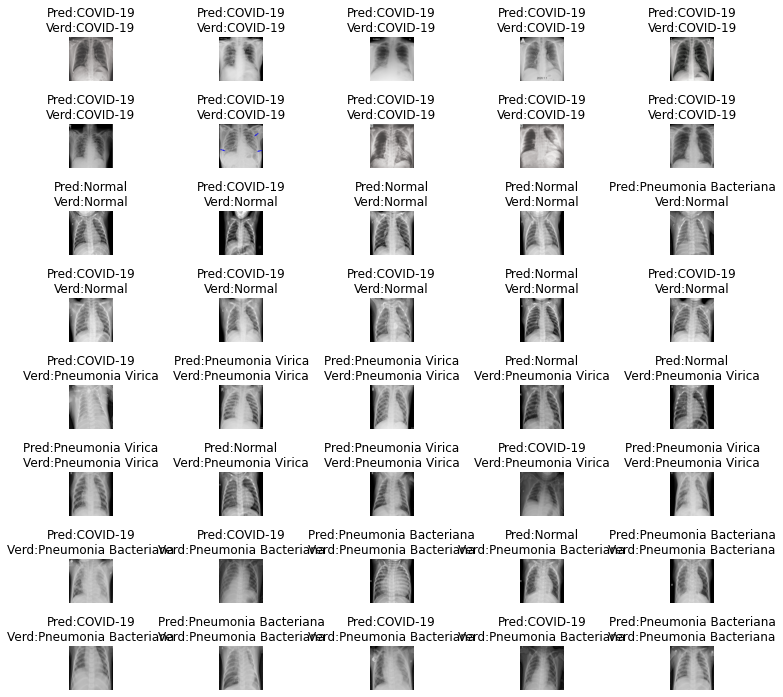

In [ ]:
# mostramos las imagenes del conjunto test
L = 8
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12)) # figsize es el tamaño
axes = axes.ravel() # aplanamos y rellenamos imagenes una tras otra

for i in np.arange(0, L*W): # rellenamos los ejes uno por uno
  axes[i].imshow(image[i]) # pintamos la imagen
  axes[i].set_title("Pred:{}\nVerd:{}".format(str(label_names[prediction[i]]), str(label_names[original[i]]))) # label_names para colocar los titulos del real y el predicho
  axes[i].axis('off') # desactivamos los ejes de dibujo
plt.subplots_adjust(wspace=1.2, hspace=1)

In [ ]:
# mostramos el array del original y predecido
print(classification_report(np.asarray(original), np.asarray(prediction)))

              precision    recall  f1-score   support

           0       0.45      1.00      0.62        10
           1       0.50      0.40      0.44        10
           2       1.00      0.50      0.67        10
           3       0.80      0.40      0.53        10

    accuracy                           0.57        40
   macro avg       0.69      0.57      0.57        40
weighted avg       0.69      0.57      0.57        40



Text(0.5, 1.0, 'Matriz de Confusion')

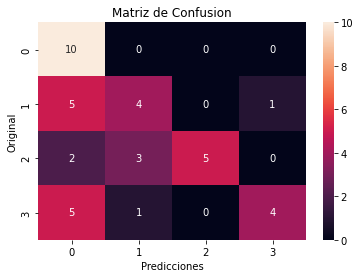

In [ ]:
# representamos la matriz de confusion
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax) # mapa de calor con anotaciones
ax.set_xlabel("Predicciones")
ax.set_ylabel("Original")
ax.set_title("Matriz de Confusion")

Mediante el uso de la red preentrenada Resnet50 tenemos los siguientes comentarios:


*   

**CONCLUSIÓN FINAL**



Como finalización de este estudio se va a realizar un repaso sobre los pasos seguidos:
1. Red neuronal sencilla: En un primer aproach al problema se ha entrenado una red con 3 capas, activación tipo relu y una acticavión sigmoide para la última capa. Los resultados de esta red han sido los siguientes:
    *  Training - Accuracy: **95%**
    *  Validation - Accuracy: **81%**
    *  Training - Loss: **11%**
    *  Validation - Loss: **119%**

Tras utilizar esta red elaborada y entrenada por nosotros, es evidente que no se consiguen buenos resultados ya que hay una pérdida excesiva en le conjunto de validación que al observar el gráfico se puede ver que incrementa. Además la diferencia en los accuracy de entrenamiento y validación dan muestras de que la red ha caido en un sobreeentrenamiento.





2. Red preentrenada VGG16: Posteriormente, se ha decidido utilizar una red neuronal preentrenada sencilla, ya que en una búsqueda de información acerca de ella se ha encontrado que contiene pocas capas convolucionales como se ha explicado anteriormente. Tras lanzar el modelo de deeplearnign con esta red, se han obtenido los siguientes resultados:


   *  Training - Accuracy: **89%**
   *  Validation - Accuracy: **91%**
   *  Training - Loss: **60%**
   *  Validation - Loss: **36%**

A la vista de los resultados se puede ver que la red VGG16 ha obtenido unos resultados óptimos para el caso de uso y con las imágenes de las que se disponía.
Se peude observar que no hay indicios de sobreentrenamiento ya que hay poca diferencia entre el accuracy del subconjunto de entrenamiento y de validación siendo mayor el de este último.


3. Red preentrenada RESNET50: Por último, se ha decido aplicar una red neuronal preentrenada más compleja para ver si puede dar mejores resultados que los obtenidos. La red neuronal Resnet50 es bastante útil para aumentar el rendimiento de las redes neuronales con múltiples capas.
En su núcleo, las ResNets son como varias redes con pequeñas modificaciones.Los resultados obtenidos han sido:


   *  Training - Accuracy: **80%**
   *  Validation - Accuracy: **65%**
   *  Training - Loss: **54%**
   *  Validation - Loss: **139%**

De igual modo que con la red nueronal sencilla, se puede ver que este tipo de red no funciona en el porblema que se está tratando. 


Por concluir, se ha visto como la red **VGG16** es una red que no teniendo mucha complejidad es muy util para el caso que estamos tratando de diferenciar patologías en imágenes radiográficas.


Adicionalmente, se ha realizado un "Data Augmentation" sobre la primera red para ver sus efectos sobre ella y por comprobar si este es un caso en el que esta técnica algo delicada puede funcionar bien. Para este data augmentation se ha selec








